In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import decomposition


import pandas as pd
import os

In [24]:
def classify_binary(xtrain,xtest,ytrain,ytest):
    knn_classifier=KNeighborsClassifier(5)
    svc_classifier=SVC()
    dt_classifier=DecisionTreeClassifier()
    rf_classifier=RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=0)
    logreg=LogisticRegression(max_iter=1000)

    knn_classifier.fit(xtrain,ytrain)
    svc_classifier.fit(xtrain,ytrain)
    dt_classifier.fit(xtrain,ytrain)
    rf_classifier.fit(xtrain,ytrain)
    logreg.fit(xtrain,ytrain)

    knn_classifier_pred=knn_classifier.predict(xtest)
    svc_classifier_pred=svc_classifier.predict(xtest)
    dt_classifier_pred=dt_classifier.predict(xtest)
    rf_classifier_pred=rf_classifier.predict(xtest)
    logreg_pred=logreg.predict(xtest)

    A1=accuracy_score(ytest,knn_classifier_pred)
    A2=accuracy_score(ytest,svc_classifier_pred)
    A3=accuracy_score(ytest,dt_classifier_pred)
    A4=accuracy_score(ytest,rf_classifier_pred)
    A5=accuracy_score(ytest,logreg_pred)

    Models=["KNN","SVC","Decision Tree","Random Forest","Logreg Pred"]
    accuracies=[A1*100,A2*100,A3*100,A4*100,A5*100]

    import pandas as pd

    # Creating a dictionary with sample data
    data = {'Models': Models,
            'Accuracies': accuracies}

    # Creating a DataFrame from the dictionary
    df = pd.DataFrame(data)

    # Displaying the DataFrame
    return df

# Bone images

## Pre-processing the dataset

In [50]:
# Directory containing the cat images
image_dir = r"C:\Users\Nehal\Desktop\fractured"  # Replace with the actual path

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

# Create a DataFrame with image paths and labels
data = {"image_path": [os.path.join(image_dir, img) for img in image_files], "label": "fractured"}
df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,image_path,label
0,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
1,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
2,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
3,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
4,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured


In [51]:
count=0
for image in image_files:
    count+=1
count

240

In [52]:
import pandas as pd
import os

# Directory containing the cat images
image_dir = r"C:\Users\Nehal\Desktop\not fractured"  # Replace with the actual path

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

# Create a DataFrame with image paths and labels
data = {"image_path": [os.path.join(image_dir, img) for img in image_files], "label": "not fractured"}
df2 = pd.DataFrame(data)

# Display the DataFrame
df2.head()

,image_path,label
0,C:\Users\Nehal\Desktop\not fractured\4-rotated...,not fractured
1,C:\Users\Nehal\Desktop\not fractured\4-rotated...,not fractured
2,C:\Users\Nehal\Desktop\not fractured\4-rotated...,not fractured
3,C:\Users\Nehal\Desktop\not fractured\4-rotated...,not fractured
4,C:\Users\Nehal\Desktop\not fractured\4-rotated...,not fractured


In [53]:
count=0
for image in image_files:
    count+=1
count

252

In [54]:
import pandas as pd

# Append df2 to df1
df = df.append(df2, ignore_index=True)

# ignore_index=True resets the index in the resulting DataFrame
df.head()

C:\Users\Nehal\AppData\Local\Temp\ipykernel_14840\3814933491.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


,image_path,label
0,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
1,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
2,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
3,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
4,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured


In [55]:
df.shape

(492, 2)

In [56]:
images=df["image_path"].values
labels=df["label"].values

In [57]:
df.head()

,image_path,label
0,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
1,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
2,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
3,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured
4,C:\Users\Nehal\Desktop\fractured\10-rotated1-r...,fractured


In [58]:
df.tail()

,image_path,label
487,C:\Users\Nehal\Desktop\not fractured\8-rotated...,not fractured
488,C:\Users\Nehal\Desktop\not fractured\8-rotated...,not fractured
489,C:\Users\Nehal\Desktop\not fractured\8-rotated...,not fractured
490,C:\Users\Nehal\Desktop\not fractured\8-rotated...,not fractured
491,C:\Users\Nehal\Desktop\not fractured\8.jpg,not fractured


In [59]:
import cv2
import numpy as np

# Define the target image size
target_size = (224,224)  # Adjust to your desired size

# Example: Numpy array of image file paths

# Create an empty NumPy array to store the preprocessed images
images_data = np.empty((len(images), *target_size,3), dtype=np.float32)

# Load and preprocess each image
for i, image_path in enumerate(images):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Resize the image to the target size
    image = cv2.resize(image, target_size)

    # Normalize the pixel values (optional but recommended)
    image = image / 255.0

    # Store the preprocessed image in the NumPy array
    images_data[i] = image

# Now, image_data is a NumPy array containing preprocessed images suitable for input to a CNN.
# The shape of image_data will be (num_images, target_height, target_width, num_channels).

In [60]:
import numpy as np
images_data = images_data.reshape((492, -1))
print(images_data.shape)

(492, 150528)


In [61]:
for i in range(len(labels)):
    if labels[i]=='fractured':
        labels[i]=1
    else:
        labels[i]=0

In [62]:
images_data, labels = shuffle(images_data, labels, random_state=0)

In [63]:
images_data.shape

(492, 150528)

In [64]:
labels.shape

(492,)

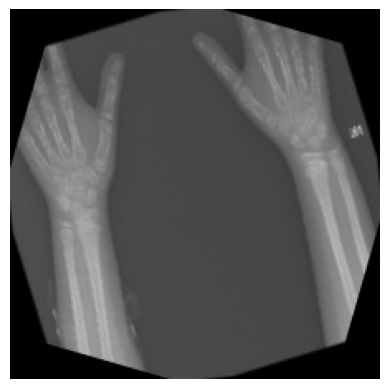

In [65]:
plt.imshow(np.reshape(images_data[50], (224,224,3)), cmap='gray')
plt.axis('off')
plt.show()

In [66]:
images_data_noise = random_noise(images_data, mode='gaussian', var=0.005)

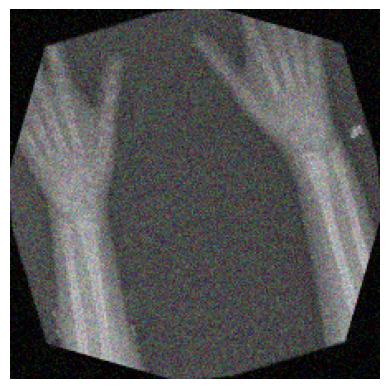

In [67]:
plt.imshow(np.reshape(images_data_noise[50], (224,224,3)), cmap='gray')
plt.axis('off')
plt.show()

## Predictions on original images

In [68]:
images_data.shape

(492, 150528)

In [69]:
xtrain,xtest,ytrain,ytest=train_test_split(images_data,labels,test_size=0.3,random_state=0)
ytrain = ytrain.astype(int)
ytest = ytest.astype(int)
classify_binary(xtrain,xtest,ytrain,ytest)

,Models,Accuracies
0,KNN,95.945946
1,SVC,95.270270
2,Decision Tree,97.297297
3,Random Forest,100.000000
4,Logreg Pred,97.972973


## Predictions on noisy images

In [70]:
images_data_noise.shape

(492, 150528)

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(images_data_noise,labels,test_size=0.3,random_state=0)
ytrain = ytrain.astype(int)
ytest = ytest.astype(int)
classify_binary(xtrain,xtest,ytrain,ytest)

,Models,Accuracies
0,KNN,95.945946
1,SVC,95.270270
2,Decision Tree,84.459459
3,Random Forest,95.945946
4,Logreg Pred,99.324324


## Applying PCA on original image and it's inverse transformation

In [72]:
pca = decomposition.PCA(n_components=40)
pca.fit(images_data)
pcaBone = pca.transform(images_data)
pcaBone.shape

(492, 40)

In [73]:
boneRecons = pca.inverse_transform(pcaBone)
boneRecons.shape

(492, 150528)

## Applying PCA on noisy images and it's inverse transformation

In [74]:
pca = decomposition.PCA(n_components=40)
pca.fit(images_data_noise)
pcaBoneNoise = pca.transform(images_data_noise)
pcaBoneNoise.shape

(492, 40)

In [75]:
boneReconsNoise = pca.inverse_transform(pcaBoneNoise)
boneReconsNoise.shape

(492, 150528)

## Predictions on PCA transformed original image

In [76]:
pcaBone.shape

(492, 40)

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(pcaBone,labels,test_size=0.3,random_state=0)
ytrain = ytrain.astype(int)
ytest = ytest.astype(int)
classify_binary(xtrain,xtest,ytrain,ytest)

,Models,Accuracies
0,KNN,97.297297
1,SVC,95.270270
2,Decision Tree,91.216216
3,Random Forest,97.972973
4,Logreg Pred,93.243243


## Predictions on PCA transformed noisy image

In [80]:
pcaBoneNoise.shape

(492, 40)

In [81]:
xtrain,xtest,ytrain,ytest=train_test_split(pcaBoneNoise,labels,test_size=0.3,random_state=0)
ytrain = ytrain.astype(int)
ytest = ytest.astype(int)
classify_binary(xtrain,xtest,ytrain,ytest)

,Models,Accuracies
0,KNN,97.297297
1,SVC,95.270270
2,Decision Tree,88.513514
3,Random Forest,97.972973
4,Logreg Pred,95.945946


**THANK YOU**